<a href="https://colab.research.google.com/github/grommitt/DS-Unit-1-Sprint-4-Linear-Algebra/blob/master/module2-intermediate-linear-algebra/Intermediate_Linear_Algebra_Assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Statistics

## 1.1 Sales for the past week was the following amounts: [3505, 2400, 3027, 2798, 3700, 3250, 2689]. Without using library functions, what is the mean, variance, and standard deviation of of sales from last week? (for extra bonus points, write your own function that can calculate these two values for any sized list)

In [0]:
import numpy as np
data = [3505, 2400, 3027, 2798, 3700, 3250, 2689]
# mean
def mean(data):
    """Return the sample arithmetic mean of data."""
    n = len(data)
    if n < 1:
        raise ValueError('mean requires at least one data point')
    return sum(data)/n # in Python 2 use sum(data)/float(n)


#variance
#variance = sum((xi - mean) ** 2 for xi in data) / len(data)
#print(variance)

#standard deviation

def _ss(data):
    """Return sum of square deviations of sequence data."""
    c = mean(data)
    ss = sum((x-c)**2 for x in data)
    return ss

def stddev(data, ddof=0):
    """Calculates the population standard deviation
    by default; specify ddof=1 to compute the sample
    standard deviation."""
    n = len(data)
    if n < 2:
        raise ValueError('variance requires at least two data points')
    ss = _ss(data)
    pvar = ss/(n-ddof)
    return pvar**0.5

## 1.2 Find the covariance between last week's sales numbers and the number of customers that entered the store last week: [127, 80, 105, 92, 120, 115, 93] (you may use librray functions for calculating the covariance since we didn't specifically talk about its formula)

In [26]:
import pandas as pd

sales = [3505, 2400, 3027, 2798, 3700, 3250, 2689]
customers = [127, 80, 105, 92, 120, 115, 93]

data = {"sales": sales, "customers": customers,}

df = pd.DataFrame(data)

df.cov()

,sales,customers
sales,214387.904762,7604.357143
customers,7604.357143,290.952381


## 1.3 Find the standard deviation of customers who entered the store last week. Then, use the standard deviations of both sales and customers to standardize the covariance to find the correlation coefficient that summarizes the relationship between sales and customers. (You may use library functions to check your work.)

In [27]:
# standard deviation of customers
import statistics
standard_deviation_customers = statistics.stdev(df['customers'])
print(standard_deviation_customers)
print('')
# standard deviation of sales
standard_deviation_sales = statistics.stdev(df['sales'])
print(standard_deviation_sales)
print('')

# find correlation coefficient
#If we divide our covariance values by the product of the standard deviations of
#the two variables, we'll end up with what's called the Correlation Coefficient
correlation = df.cov()/(standard_deviation_sales*standard_deviation_customers)
print(correlation) # the right diagonals seems to be different, but not the lefts
#check
df.corr()

17.057326313123664

463.02041505953576

               sales  customers
sales      27.144959   0.962834
customers   0.962834   0.036839


,sales,customers
sales,1.000000,0.962834
customers,0.962834,1.000000


## 1.4 Use pandas to import a cleaned version of the titanic dataset from the following link: [Titanic Dataset](https://raw.githubusercontent.com/Geoyi/Cleaning-Titanic-Data/master/titanic_clean.csv)

## Calculate the variance-covariance matrix and correlation matrix for the titanic dataset's numeric columns. (you can encode some of the categorical variables and include them as a stretch goal if you finish early)

In [28]:
df = pd.read_csv('https://raw.githubusercontent.com/Geoyi/Cleaning-Titanic-Data/master/titanic_clean.csv')
df.head()

df.cov()
df.corr()

,Unnamed: 0,pclass,survived,age,sibsp,parch,fare,body,has_cabin_number
Unnamed: 0,1.000000,0.897822,-0.293717,-0.296172,0.065594,0.003584,-0.481215,0.015558,-0.603727
pclass,0.897822,1.000000,-0.312469,-0.366370,0.060832,0.018322,-0.558629,-0.034642,-0.713857
survived,-0.293717,-0.312469,1.000000,-0.050199,-0.027825,0.082660,0.244265,NaN,0.302250
age,-0.296172,-0.366370,-0.050199,1.000000,-0.190747,-0.130872,0.171892,0.059059,0.271887
sibsp,0.065594,0.060832,-0.027825,-0.190747,1.000000,0.373587,0.160238,-0.099961,-0.009064
parch,0.003584,0.018322,0.082660,-0.130872,0.373587,1.000000,0.221539,0.051099,0.036806
fare,-0.481215,-0.558629,0.244265,0.171892,0.160238,0.221539,1.000000,-0.043110,0.507253
body,0.015558,-0.034642,NaN,0.059059,-0.099961,0.051099,-0.043110,1.000000,0.083796
has_cabin_number,-0.603727,-0.713857,0.302250,0.271887,-0.009064,0.036806,0.507253,0.083796,1.000000


# Orthogonality

## 2.1 Plot two vectors that are orthogonal to each other. What is a synonym for orthogonal?

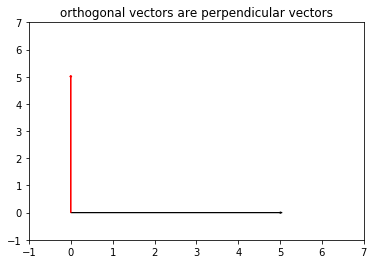

In [29]:
import matplotlib.pyplot as plt
# orthogonal: perpendicular

vector1 = [5, 0]
vector2 = [0, 5]

# plot the scales vectors
plt.arrow(0, 0, vector1[0], vector1[1], head_width=.05, head_length=0.05, color='black')
plt.arrow(0, 0, vector2[0], vector2[1], head_width=.05, head_length=0.05, color='red')
plt.xlim(-1, 7)
plt.ylim(-1, 7)
plt.title('orthogonal vectors are perpendicular vectors')
plt.show()

## 2.2 Are the following vectors orthogonal? Why or why not?

\begin{align}
a = \begin{bmatrix} -5 \\ 3 \\ 7 \end{bmatrix}
\qquad
b = \begin{bmatrix} 6 \\ -8 \\ 2 \end{bmatrix}
\end{align}

In [30]:
# these vectors are not orthogonal because their dot product is -40. 
# The dot product of two vectors must be 0 to be orthogonal by definition.
a = [-5, 3, 7]
b = [6, -8, 2]
ab_ortho = np.dot(a,b)
print(ab_ortho)

-40


## 2.3 Compute the following values: What do these quantities have in common?

## What is $||c||^2$? 

## What is $c \cdot c$? 

## What is $c^{T}c$?

\begin{align}
c = \begin{bmatrix} 2 & -15 & 6 & 20 \end{bmatrix}
\end{align}

In [31]:

c = [2, -15, 6, 20]

# norm (length/magnitude).

c_norm = np.linalg.norm(c)
#print(c_norm)

c_norm_squared = c_norm*c_norm
print('The squared norm of C is:')
print(c_norm_squared)

print('')
# c dot c
c_dot_c = np.dot(c, c)
print('The dot product of c and c is:')
print(c_dot_c)

print('')
#c transpose c
c_transpose = np.transpose(c)
c_transpose_c = c_transpose*c
print('C_transpose_C is:')
print(c_transpose_c)

# all of these elements have the number 665 in common

The squared norm of C is:
665.0

The dot product of c and c is:
665

C_transpose_C is:
[  4 225  36 400]


# Unit Vectors

## 3.1 Using Latex, write the following vectors as a linear combination of scalars and unit vectors:

\begin{align}
d = \begin{bmatrix} 7 \\ 12 \end{bmatrix}
\qquad
e = \begin{bmatrix} 2 \\ 11 \\ -8  \end{bmatrix}
\end{align}

\begin{align}
d = \begin{bmatrix} 7 \\ 12 \end{bmatrix} = 7\begin{bmatrix} 1 \\ 0 \end{bmatrix} + 12\begin{bmatrix} 0 \\ 1 \end{bmatrix} = 7\hat{i} + 12\hat{j}
\end{align}

\begin{align}
e = \begin{bmatrix} 2 \\ 11 \\ -8 \end{bmatrix} = 2\begin{bmatrix} 1 \\ 0 \\0\end{bmatrix} + 11\begin{bmatrix} 0 \\ 1\\ 0 \end{bmatrix} + -8\begin{bmatrix} 0 \\ 0 \\1\end{bmatrix}= 2\hat{i} + 11\hat{j} - 8\hat{k}
\end{align}

## 3.2 Turn vector $f$ into a unit vector:

\begin{align}
f = \begin{bmatrix} 4 & 12 & 11 & 9 & 2 \end{bmatrix}
\end{align}

In [32]:
f = [4, 12, 11, 9, 2]

# In Linear Algebra a unit vector is any vector of "unit length" (1).
#You can turn any non-zero vector into a unit vector by 
#dividing it by its norm (length/magnitude).

f_norm = np.linalg.norm(f)

f_unit_vector = f/f_norm
print('The unit vector of f is:')
print(f_unit_vector)


The unit vector of f is:
[0.20908335 0.62725005 0.57497921 0.47043754 0.10454167]


# Linear Independence / Dependence 

## 4.1 Plot two vectors that are linearly dependent and two vectors that are linearly independent (bonus points if done in $\mathbb{R}^3$).

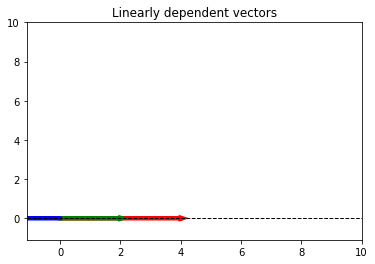

In [33]:
# plot linearly dependent vectors

# axis bounds
plt.xlim(-1.1, 10)
plt.ylim(-1.1, 10)

# original vector
vector = [2, 0]

# scaled vectors
scaled_vector1 = np.multiply(2, vector)
scaled_vector2 = np.multiply(-2, vector)

# get values for L
axes = plt.gca()
x_values = np.array(axes.get_xlim())
y_values = 0*x_values

# plot vectors and L
plt.plot(x_values, y_values, '--', color='black', linewidth=1)
plt.arrow(0, 0, scaled_vector1[0], scaled_vector1[1], linewidth=4, head_width=.07, head_length=0.07, color='red')
plt.arrow(0, 0, vector[0], vector[1], linewidth=4, head_width=.07, head_length=0.07, color='green')
plt.arrow(0, 0, scaled_vector2[0], scaled_vector2[1], linewidth=4, head_width=.07, head_length=0.07, color='blue')
plt.title('Linearly dependent vectors')
plt.show()

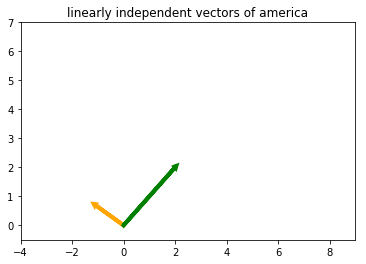

In [34]:
# linearly independent vectors

# axis bounds
plt.xlim(-4, 9)
plt.ylim(-.5, 7)

# original vector
first_vector = [-1.1, .7]
second_vector = [2, 2]

# plot vectors
plt.arrow(0, 0, first_vector[0], first_vector[1], linewidth=4, head_width=.07, head_length=0.07, color='orange')
plt.arrow(0, 0, second_vector[0], second_vector[1], linewidth=4, head_width=.07, head_length=0.07, color='green')
plt.title('linearly independent vectors of america')
plt.show()

# Span

## 5.1 What is the span of the following vectors?

\begin{align}
g = \begin{bmatrix} 1 & 2 \end{bmatrix}
\qquad
h = \begin{bmatrix} 4 & 8 \end{bmatrix}
\end{align}

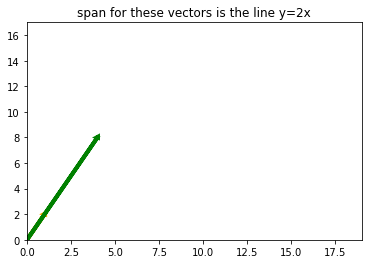

In [35]:
 
# axis bounds
plt.xlim(0, 19)
plt.ylim(0, 17)

# original vector
first_vector = [1, 2]
second_vector = [4, 8]

# plot vectors
plt.arrow(0, 0, first_vector[0], first_vector[1], linewidth=4, head_width=.07, head_length=0.07, color='orange')
plt.arrow(0, 0, second_vector[0], second_vector[1], linewidth=4, head_width=.07, head_length=0.07, color='green')
plt.title('span for these vectors is the line y=2x')
plt.show()


## 5.2 What is the span of $\{l, m, n\}$?

\begin{align}
l = \begin{bmatrix} 1 & 2 & 3 \end{bmatrix}
\qquad
m = \begin{bmatrix} -1 & 0 & 7 \end{bmatrix}
\qquad
n = \begin{bmatrix} 4 & 8  & 2\end{bmatrix}
\end{align}

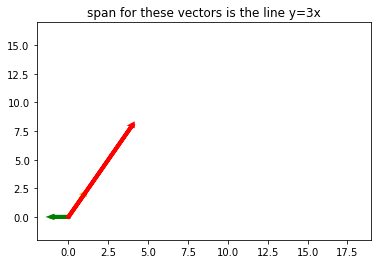

In [36]:



# axis bounds
plt.xlim(-2, 19)
plt.ylim(-2, 17)

# original vector
l=[1, 2, 3]
m=[-1, 0, 7]
n=[4, 8, 2]

# plot vectors
plt.arrow(0, 0, l[0], l[1], linewidth=4, head_width=.07, head_length=0.07, color='orange')
plt.arrow(0, 0, m[0], m[1], linewidth=4, head_width=.07, head_length=0.07, color='green')
plt.arrow(0, 0, n[0], n[1], linewidth=4, head_width=.07, head_length=0.07, color='red')
plt.title('span for these vectors is the line y=3x')
plt.show()



# Basis

## 6.1 Graph two vectors that form a basis for $\mathbb{R}^2$



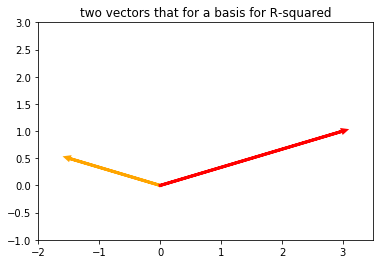

In [37]:
# Plot Linearly independent Vectors

# Axis Bounds
plt.xlim(-2,3.5)          
plt.ylim(-1,3)

# Original Vector
a = [-1.5,.5] 
b = [3, 1]

# Plot Vectors
plt.arrow(0,0, a[0], a[1], linewidth=3, head_width=.05, head_length=0.05, color ='orange')
plt.arrow(0,0, b[0], b[1], linewidth=3, head_width=.05, head_length=0.05, color ='red')

plt.title("two vectors that for a basis for R-squared")
plt.show()

## 6.2 What does it mean to form a basis?

vector space  R2  form a basis because they are linearly independent and span that space.

# Rank

## 7.1 What is the Rank of P?

\begin{align}
P = \begin{bmatrix} 
1 & 2 & 3 \\
 -1 & 0 & 7 \\
4 & 8  & 2
\end{bmatrix}
\end{align}

In [38]:
import numpy as np
P = np.array([[1, 2, 3],
              [-1, 0, 7],
              [4, 8, 2]])
P_rank = np.linalg.matrix_rank(P)
print(P_rank)

3


## 7.2 What does the rank of a matrix tell us?

The rank of a matrix is the dimension of the vector space spanned by its columns.

# Linear Projections

## 8.1 Line $L$ is formed by all of the vectors that can be created by scaling vector $v$ 
\begin{align}
v = \begin{bmatrix} 1 & 3 \end{bmatrix}
\end{align}

\begin{align}
w = \begin{bmatrix} -1 & 2 \end{bmatrix}
\end{align}

## find $proj_{L}(w)$

## graph your projected vector to check your work (make sure your axis are square/even)

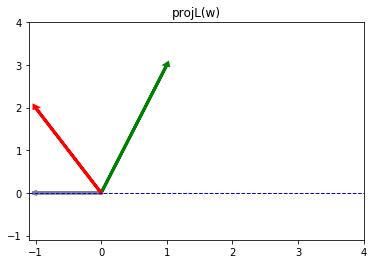

In [46]:
# Axis Bounds
plt.xlim(-1.1,4)          
plt.ylim(-1.1,4)

# Original Vector
v = [1,3] 
w = [-1,2]
proj = [-1,0]

# Get Vals for L
axes = plt.gca()
x_vals = np.array(axes.get_xlim())
y_vals = 0*x_vals

# Plot Vectors and L
plt.plot(x_vals, y_vals, '--', color='b', linewidth=1)
plt.arrow(0, 0, proj[0], proj[1], linewidth=3, head_width=.05, head_length=0.05, color ='gray')
plt.arrow(0, 0, v[0], v[1], linewidth=3, head_width=.05, head_length=0.05, color ='green')
plt.arrow(0, 0, w[0], w[1], linewidth=3, head_width=.05, head_length=0.05, color ='red')

plt.title("projL(w)")
plt.show()

# Stretch Goal

## For vectors that begin at the origin, the coordinates of where the vector ends can be interpreted as regular data points. (See 3Blue1Brown videos about Spans, Basis, etc.)

## Write a function that can calculate the linear projection of each point (x,y) (vector) onto the line y=x. run the function and plot the original points in blue and the new projected points on the line y=x in red. 

## For extra points plot the orthogonal vectors as a dashed line from the original blue points to the projected red points.

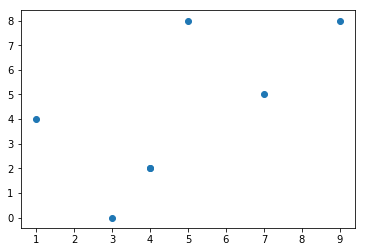

In [39]:
import pandas as pd
import matplotlib.pyplot as plt

# Creating a dataframe for you to work with -Feel free to not use the dataframe if you don't want to.
x_values = [1, 4, 7, 3, 9, 4, 5 ]
y_values = [4, 2, 5, 0, 8, 2, 8]

data = {"x": x_values, "y": y_values}

df = pd.DataFrame(data)

df.head()

plt.scatter(df.x, df.y)
plt.show()